In [1]:
import pandas as pd
import numpy as np
import unicodedata
import datetime as dt
import io
import requests
import matplotlib.pyplot as plt

## Getting data of COVID-19

In [2]:
# Download csv from MINSA
url="https://cloud.minsa.gob.pe/s/Y8w3wHsEdYQSZRp/download"
s=requests.get(url).content

data = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';', low_memory=False)
data.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210228,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,20200526.0
1,20210228,e81602051997ace8340bb8c18fe24c65,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,20200425.0
2,20210228,cecdbf10074dbc011ae05b3cbd320a6f,APURIMAC,ABANCAY,ABANCAY,PR,34.0,FEMENINO,20200429.0
3,20210228,71ecb6bccb248b0bb2ac72ed51b5e979,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PR,40.0,FEMENINO,20200426.0
4,20210228,566af4276cbe9359abe93f9aa86396c3,APURIMAC,ABANCAY,ABANCAY,PR,40.0,FEMENINO,20200428.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332939 entries, 0 to 1332938
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   FECHA_CORTE      1332939 non-null  int64  
 1   UUID             1332939 non-null  object 
 2   DEPARTAMENTO     1332939 non-null  object 
 3   PROVINCIA        1332939 non-null  object 
 4   DISTRITO         1332939 non-null  object 
 5   METODODX         1332939 non-null  object 
 6   EDAD             1332633 non-null  float64
 7   SEXO             1332939 non-null  object 
 8   FECHA_RESULTADO  1330916 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 91.5+ MB


In [4]:
data.FECHA_RESULTADO.max()

20210228.0

In [5]:
# Check dimension of dataset
print(data.shape)

(1332939, 9)


In [6]:
# Remove the  UUID column
data_clean = data.drop(columns=['UUID'], axis=1)

In [7]:
# check number of nulls
data.isnull().sum()

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                306
SEXO                  0
FECHA_RESULTADO    2023
dtype: int64

In [8]:
# remove null values
data_clean = data_clean.dropna(subset=['FECHA_RESULTADO'])
data_clean = data_clean.dropna(subset=['EDAD'])
print(data_clean.isnull().sum())
data_clean.shape

FECHA_CORTE        0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
METODODX           0
EDAD               0
SEXO               0
FECHA_RESULTADO    0
dtype: int64


(1330610, 8)

In [9]:
# format date in both columns
data_clean['FECHA_RESULTADO'] = data_clean['FECHA_RESULTADO'].apply(lambda x:str(x)[0:4] +
                                                                    '-' + str(x)[4:6] + 
                                                                    '-' + str(x)[6:8])
data_clean['FECHA_CORTE'] = data_clean['FECHA_CORTE'].apply(lambda x:str(x)[0:4] +
                                                                    '-' + str(x)[4:6] + 
                                                                    '-' + str(x)[6:8])

In [10]:
data_clean['FECHA_RESULTADO'] = pd.to_datetime(data_clean['FECHA_RESULTADO'], format='%Y-%m-%d')
data_clean.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,2021-02-28,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,2020-05-26
1,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,2020-04-25
2,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,34.0,FEMENINO,2020-04-29
3,2021-02-28,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PR,40.0,FEMENINO,2020-04-26
4,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,40.0,FEMENINO,2020-04-28


In [11]:
# Final dimension after cleaning
print(data_clean.shape)

(1330610, 8)


In [12]:
data_clean = data_clean.rename({'FECHA_RESULTADO':'DATE'}, axis = 1)
data_clean

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,DATE
0,2021-02-28,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,2020-05-26
1,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,2020-04-25
2,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,34.0,FEMENINO,2020-04-29
3,2021-02-28,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PR,40.0,FEMENINO,2020-04-26
4,2021-02-28,APURIMAC,ABANCAY,ABANCAY,PR,40.0,FEMENINO,2020-04-28
...,...,...,...,...,...,...,...,...
1332934,2021-02-28,CUSCO,CUSCO,CUSCO,PCR,29.0,MASCULINO,2020-07-14
1332935,2021-02-28,CUSCO,LA CONVENCION,SANTA ANA,PCR,29.0,MASCULINO,2020-07-21
1332936,2021-02-28,CUSCO,CUSCO,CUSCO,PCR,25.0,MASCULINO,2020-07-16
1332937,2021-02-28,CUSCO,CUSCO,CUSCO,PCR,25.0,MASCULINO,2020-07-17


## Group by day

In [13]:
df_group = data_clean.groupby(['DATE']).size().reset_index(name='COUNT')
df_group = df_group.set_index('DATE')
df_group.head()

,COUNT
DATE,
2020-03-06,1
2020-03-07,5
2020-03-08,2
2020-03-09,3
2020-03-10,1


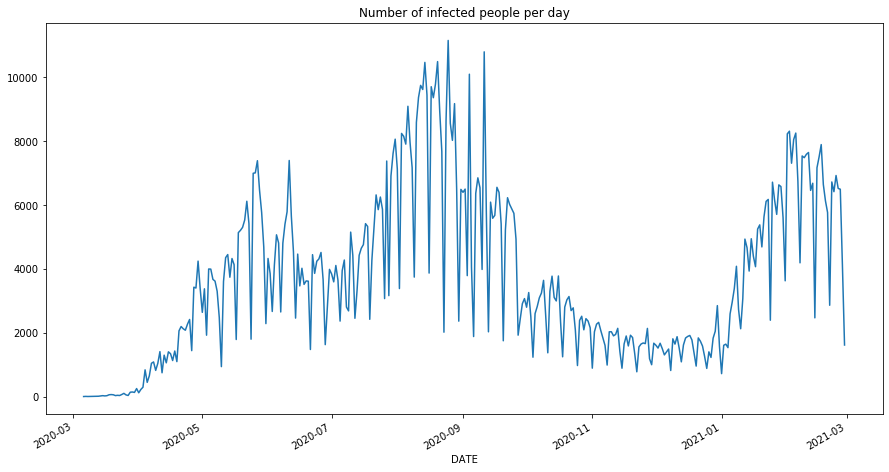

In [14]:
plt.figure(figsize=(15,8))
df_day = df_group['COUNT'].copy()
df_day.plot(title='Number of infected people per day')
plt.show()

## Group by week

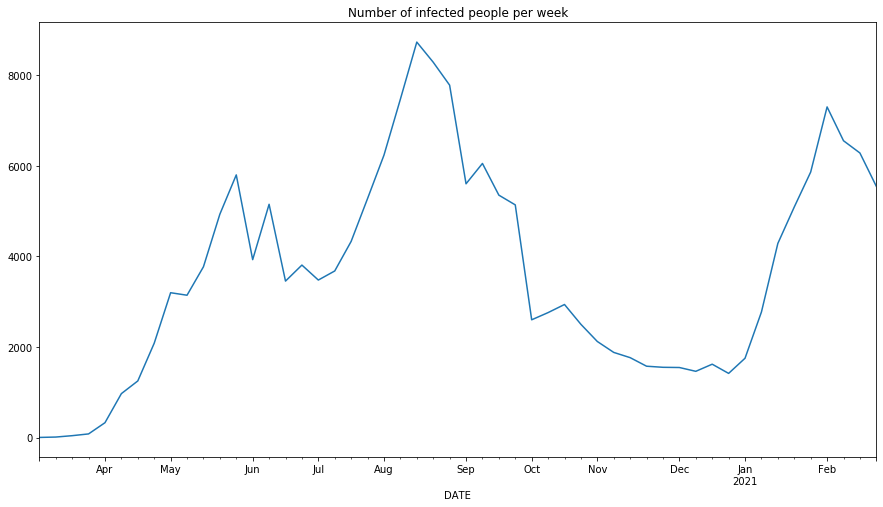

In [15]:
# resample over week (D)
freq = 'W'
# calculate the mean active power for a day
mean_week_df = df_day.resample(freq).mean()

plt.figure(figsize=(15,8))
mean_week_df.plot(title='Number of infected people per week') 
plt.show();

## Group by month

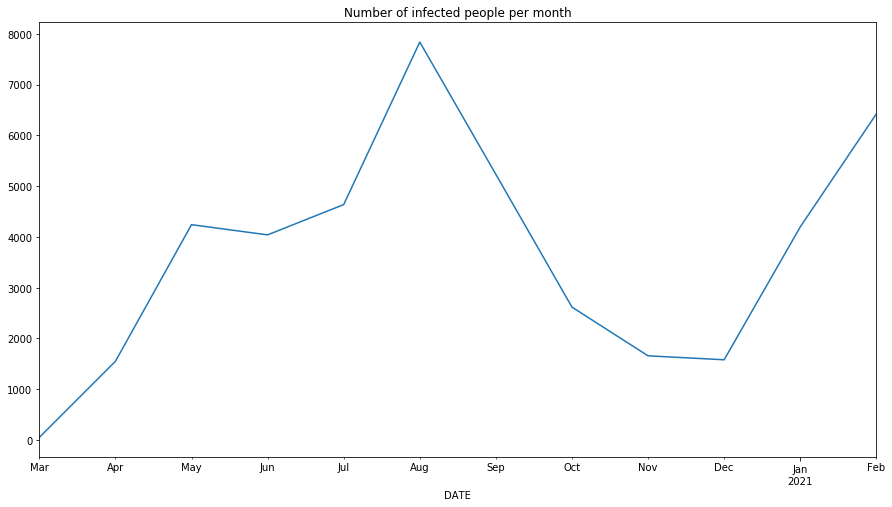

In [16]:
# resample over day (D)
freq = 'M'
mean_month_df = df_day.resample(freq).mean()

# display the mean values
plt.figure(figsize=(15,8))
mean_month_df.plot(title='Number of infected people per month') 
plt.show();

## Create Time Series

In [17]:
df_day.shape

(358,)

In [18]:
df_day[240:280]

DATE
2020-11-01     890
2020-11-02    2029
2020-11-03    2268
2020-11-04    2325
2020-11-05    2070
2020-11-07    1603
2020-11-08     987
2020-11-09    2030
2020-11-10    2030
2020-11-11    1903
2020-11-12    1947
2020-11-13    2138
2020-11-14    1416
2020-11-15     888
2020-11-16    1646
2020-11-17    1898
2020-11-18    1586
2020-11-19    1922
2020-11-20    1850
2020-11-21    1351
2020-11-22     776
2020-11-23    1556
2020-11-24    1646
2020-11-25    1679
2020-11-26    1659
2020-11-27    2136
2020-11-28    1186
2020-11-29     998
2020-11-30    1672
2020-12-01    1609
2020-12-02    1519
2020-12-03    1671
2020-12-04    1504
2020-12-05    1306
2020-12-07    1489
2020-12-08     817
2020-12-09    1810
2020-12-10    1644
2020-12-11    1876
2020-12-12    1515
Name: COUNT, dtype: int64

In [19]:
def make_time_series(df, freq='D', start_idx=0):
    # store time series
    time_series = []

    end_idx = len(df)
    data = df[start_idx:end_idx]
    
    t_start = dt.datetime.strftime(data.index[0], '%Y-%m-%d') 
    t_end = dt.datetime.strftime(data.index[-1], '%Y-%m-%d')
    
    index = pd.date_range(start=t_start, end=t_end, freq=freq)
    time_series.append(pd.Series(data=data, index=index))
        
    
    # return list of time series
    return time_series
    

In [20]:
freq='D' # daily recordings

time_series = make_time_series(df_day, freq=freq)
time_series

[2020-03-06       1.0
 2020-03-07       5.0
 2020-03-08       2.0
 2020-03-09       3.0
 2020-03-10       1.0
                ...  
 2021-02-24    6928.0
 2021-02-25    6523.0
 2021-02-26    6498.0
 2021-02-27    4124.0
 2021-02-28    1615.0
 Freq: D, Name: COUNT, Length: 360, dtype: float64]

In [21]:
time_series[0][245] = 0
time_series[0][275] = 0

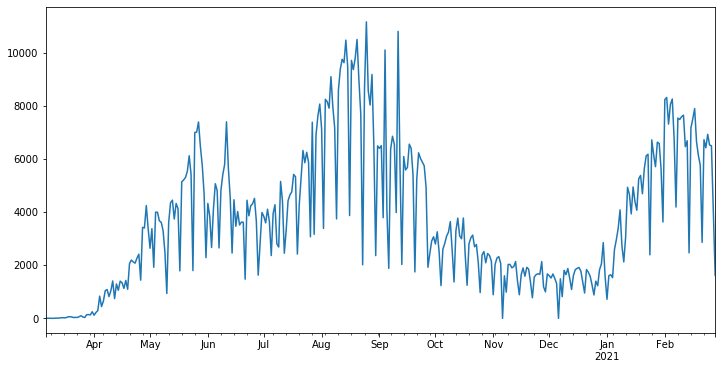

In [22]:
# display first time series
# First week
time_series_idx = 0

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot()
plt.show()

## Splitting in Time

In [23]:
# create truncated, training time series
def create_training_series(complete_time_series, prediction_length):
    # get training series
    time_series_training = []
    
    for ts in complete_time_series:
        time_series_training.append(ts[:-prediction_length])
        
    return time_series_training

In [24]:
prediction_length = 14 # 2 last weeks

time_series_training = create_training_series(time_series, prediction_length)
time_series_training

[2020-03-06       1.0
 2020-03-07       5.0
 2020-03-08       2.0
 2020-03-09       3.0
 2020-03-10       1.0
                ...  
 2021-02-10    7592.0
 2021-02-11    7649.0
 2021-02-12    6462.0
 2021-02-13    6686.0
 2021-02-14    2467.0
 Freq: D, Name: COUNT, Length: 346, dtype: float64]

### Training and Test Series

In [25]:
time_series

[2020-03-06       1.0
 2020-03-07       5.0
 2020-03-08       2.0
 2020-03-09       3.0
 2020-03-10       1.0
                ...  
 2021-02-24    6928.0
 2021-02-25    6523.0
 2021-02-26    6498.0
 2021-02-27    4124.0
 2021-02-28    1615.0
 Freq: D, Name: COUNT, Length: 360, dtype: float64]

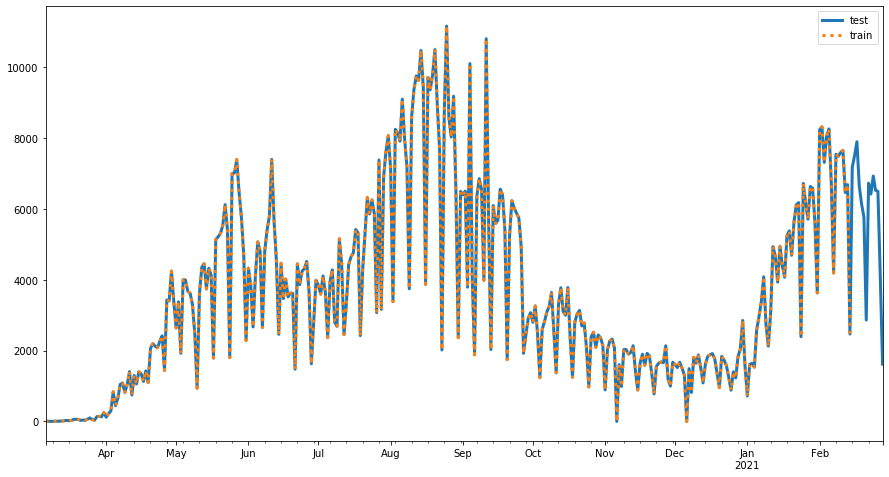

In [26]:
time_series_idx = 0 # just we have one time-serie

plt.figure(figsize=(15,8))
time_series[time_series_idx].plot(label='test', lw=3)
time_series_training[time_series_idx].plot(label='train', ls=':', lw=3)

plt.legend()
plt.show()

## Convert to JSON

In [27]:
def series_to_json_obj(ts):
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    print(json_obj)
    return json_obj

## Saving Data, Locally

In [28]:
import json
import os # and os for saving

def write_json_dataset(time_series, filename): 
    with open(filename, 'wb') as f:
        # for each of our times series, there is one JSON line
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

In [29]:
# save this data to a local directory
data_dir = 'json_covid_data'

# make data dir, if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [30]:
# directories to save train/test data
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

# write train/test JSON files
write_json_dataset(time_series, train_key)        
write_json_dataset(time_series_training, test_key)

{'start': '2020-03-06 00:00:00', 'target': [1.0, 5.0, 2.0, 3.0, 1.0, 8.0, 8.0, 10.0, 19.0, 28.0, 20.0, 27.0, 56.0, 62.0, 56.0, 30.0, 39.0, 33.0, 64.0, 100.0, 52.0, 34.0, 136.0, 143.0, 130.0, 250.0, 118.0, 222.0, 293.0, 837.0, 445.0, 650.0, 1043.0, 1085.0, 820.0, 1040.0, 1408.0, 745.0, 1297.0, 1057.0, 1402.0, 1343.0, 1129.0, 1427.0, 1095.0, 2060.0, 2195.0, 2125.0, 2079.0, 2268.0, 2416.0, 1439.0, 3427.0, 3402.0, 4245.0, 3376.0, 2639.0, 3377.0, 1923.0, 3998.0, 3994.0, 3673.0, 3618.0, 3302.0, 2479.0, 938.0, 3607.0, 4353.0, 4450.0, 3740.0, 4326.0, 4134.0, 1788.0, 5138.0, 5210.0, 5303.0, 5534.0, 6121.0, 5421.0, 1798.0, 6998.0, 7011.0, 7392.0, 6468.0, 5765.0, 4682.0, 2286.0, 4328.0, 3855.0, 2667.0, 4119.0, 5069.0, 4813.0, 2651.0, 4809.0, 5404.0, 5793.0, 7399.0, 5659.0, 4537.0, 2459.0, 4465.0, 3468.0, 4021.0, 3516.0, 3624.0, 3616.0, 1475.0, 4447.0, 3861.0, 4241.0, 4313.0, 4516.0, 3658.0, 1627.0, 2806.0, 3986.0, 3843.0, 3595.0, 4108.0, 3645.0, 2365.0, 3946.0, 4279.0, 2805.0, 2685.0, 5154.0, 442

In [31]:
with open('json_covid_data/train.json') as f:
    d = json.load(f)
    print(d)

{'start': '2020-03-06 00:00:00', 'target': [1.0, 5.0, 2.0, 3.0, 1.0, 8.0, 8.0, 10.0, 19.0, 28.0, 20.0, 27.0, 56.0, 62.0, 56.0, 30.0, 39.0, 33.0, 64.0, 100.0, 52.0, 34.0, 136.0, 143.0, 130.0, 250.0, 118.0, 222.0, 293.0, 837.0, 445.0, 650.0, 1043.0, 1085.0, 820.0, 1040.0, 1408.0, 745.0, 1297.0, 1057.0, 1402.0, 1343.0, 1129.0, 1427.0, 1095.0, 2060.0, 2195.0, 2125.0, 2079.0, 2268.0, 2416.0, 1439.0, 3427.0, 3402.0, 4245.0, 3376.0, 2639.0, 3377.0, 1923.0, 3998.0, 3994.0, 3673.0, 3618.0, 3302.0, 2479.0, 938.0, 3607.0, 4353.0, 4450.0, 3740.0, 4326.0, 4134.0, 1788.0, 5138.0, 5210.0, 5303.0, 5534.0, 6121.0, 5421.0, 1798.0, 6998.0, 7011.0, 7392.0, 6468.0, 5765.0, 4682.0, 2286.0, 4328.0, 3855.0, 2667.0, 4119.0, 5069.0, 4813.0, 2651.0, 4809.0, 5404.0, 5793.0, 7399.0, 5659.0, 4537.0, 2459.0, 4465.0, 3468.0, 4021.0, 3516.0, 3624.0, 3616.0, 1475.0, 4447.0, 3861.0, 4241.0, 4313.0, 4516.0, 3658.0, 1627.0, 2806.0, 3986.0, 3843.0, 3595.0, 4108.0, 3645.0, 2365.0, 3946.0, 4279.0, 2805.0, 2685.0, 5154.0, 442

## Uploading Data to S3

In [32]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [33]:
# session, role, bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()

### EXERCISE: Upoad *both* training and test JSON 

In [34]:
# general prefix
prefix='deepar-covid-consumption'

# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(prefix, 'train')
test_prefix    = '{}/{}'.format(prefix, 'test')

# uploading data to S3, and saving locations
train_path  = sagemaker_session.upload_data(train_key, bucket=bucket, key_prefix=train_prefix)
test_path   = sagemaker_session.upload_data(test_key,  bucket=bucket, key_prefix=test_prefix)

In [35]:
# check locations
print('Training data is stored in: '+ train_path)
print('Test data is stored in: '+ test_path)

Training data is stored in: s3://sagemaker-us-east-1-583433464661/deepar-covid-consumption/train/train.json
Test data is stored in: s3://sagemaker-us-east-1-583433464661/deepar-covid-consumption/test/test.json


## Training a DeepAR Estimator

In [36]:
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker import image_uris

image_name = image_uris.retrieve("forecasting-deepar", boto3.Session().region_name)

## Instantiate an Estimator

In [37]:
from sagemaker.estimator import Estimator

# dir to save model artifacts
s3_output_path = "s3://{}/{}/output".format(bucket, prefix)

# instantiate a DeepAR estimator
estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_uri=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c4.xlarge',
                      output_path=s3_output_path
                      )

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


## Setting Hyperparameters

In [38]:
freq='D'
context_length=14 # same as prediction_length
prediction_length = 14
hyperparameters = {
    "epochs": "50",
    "time_freq": freq,
    "prediction_length": str(prediction_length),
    "context_length": str(context_length),
    "num_cells": "50",
    "num_layers": "2",
    "mini_batch_size": "128",
    "learning_rate": "0.001",
    "early_stopping_patience": "10"
}

In [39]:
# set the hyperparams
estimator.set_hyperparameters(**hyperparameters)

## Training Job

In [40]:
data_channels = {
    "train": train_path,
    "test": test_path
}

estimator.fit(inputs=data_channels)

2021-03-02 23:48:56 Starting - Starting the training job...
2021-03-02 23:49:20 Starting - Launching requested ML instancesProfilerReport-1614728936: InProgress
......
2021-03-02 23:50:20 Starting - Preparing the instances for training.........
2021-03-02 23:51:56 Downloading - Downloading input data
2021-03-02 23:51:56 Training - Downloading the training image...
2021-03-02 23:52:22 Training - Training image download completed. Training in progress..Arguments: train
[03/02/2021 23:52:23 INFO 140199947417408] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_

[03/02/2021 23:52:32 INFO 140199947417408] Epoch[5] Batch[5] avg_epoch_loss=8.079263
[03/02/2021 23:52:32 INFO 140199947417408] #quality_metric: host=algo-1, epoch=5, batch=5 train loss <loss>=8.07926336924
[03/02/2021 23:52:32 INFO 140199947417408] Epoch[5] Batch [5]#011Speed: 1507.54 samples/sec#011loss=8.079263
[03/02/2021 23:52:32 INFO 140199947417408] Epoch[5] Batch[10] avg_epoch_loss=8.142425
[03/02/2021 23:52:32 INFO 140199947417408] #quality_metric: host=algo-1, epoch=5, batch=10 train loss <loss>=8.2182185173
[03/02/2021 23:52:32 INFO 140199947417408] Epoch[5] Batch [10]#011Speed: 1483.60 samples/sec#011loss=8.218219
[03/02/2021 23:52:32 INFO 140199947417408] processed a total of 1313 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1359.4019412994385, "sum": 1359.4019412994385, "min": 1359.4019412994385}}, "EndTime": 1614729152.827991, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1614729151.468531}

[03/02

[03/02/2021 23:52:42 INFO 140199947417408] Epoch[13] Batch[0] avg_epoch_loss=7.767053
[03/02/2021 23:52:42 INFO 140199947417408] #quality_metric: host=algo-1, epoch=13, batch=0 train loss <loss>=7.76705265045
[03/02/2021 23:52:43 INFO 140199947417408] Epoch[13] Batch[5] avg_epoch_loss=7.737589
[03/02/2021 23:52:43 INFO 140199947417408] #quality_metric: host=algo-1, epoch=13, batch=5 train loss <loss>=7.73758935928
[03/02/2021 23:52:43 INFO 140199947417408] Epoch[13] Batch [5]#011Speed: 1488.63 samples/sec#011loss=7.737589
[03/02/2021 23:52:43 INFO 140199947417408] Epoch[13] Batch[10] avg_epoch_loss=7.738593
[03/02/2021 23:52:43 INFO 140199947417408] #quality_metric: host=algo-1, epoch=13, batch=10 train loss <loss>=7.73979845047
[03/02/2021 23:52:43 INFO 140199947417408] Epoch[13] Batch [10]#011Speed: 1552.95 samples/sec#011loss=7.739798
[03/02/2021 23:52:43 INFO 140199947417408] processed a total of 1322 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1358.7629795074

[03/02/2021 23:52:52 INFO 140199947417408] processed a total of 1269 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1228.254795074463, "sum": 1228.254795074463, "min": 1228.254795074463}}, "EndTime": 1614729172.423711, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1614729171.195396}

[03/02/2021 23:52:52 INFO 140199947417408] #throughput_metric: host=algo-1, train throughput=1033.0603534 records/second
[03/02/2021 23:52:52 INFO 140199947417408] #progress_metric: host=algo-1, completed 42 % of epochs
[03/02/2021 23:52:52 INFO 140199947417408] #quality_metric: host=algo-1, epoch=20, train loss <loss>=7.52800378799
[03/02/2021 23:52:52 INFO 140199947417408] best epoch loss so far
[03/02/2021 23:52:52 INFO 140199947417408] Saved checkpoint to "/opt/ml/model/state_6114c327-3cde-40ac-bf6d-04eb7e5cc73f-0000.params"
#metrics {"Metrics": {"state.serialize.time": {"count": 1, "max": 13.484954833984375, "sum": 13.484954833984

[03/02/2021 23:53:02 INFO 140199947417408] Epoch[28] Batch[0] avg_epoch_loss=7.504908
[03/02/2021 23:53:02 INFO 140199947417408] #quality_metric: host=algo-1, epoch=28, batch=0 train loss <loss>=7.50490808487
[03/02/2021 23:53:02 INFO 140199947417408] Epoch[28] Batch[5] avg_epoch_loss=7.501921
[03/02/2021 23:53:02 INFO 140199947417408] #quality_metric: host=algo-1, epoch=28, batch=5 train loss <loss>=7.5019214948
[03/02/2021 23:53:02 INFO 140199947417408] Epoch[28] Batch [5]#011Speed: 1505.97 samples/sec#011loss=7.501921
[03/02/2021 23:53:03 INFO 140199947417408] processed a total of 1243 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1245.7048892974854, "sum": 1245.7048892974854, "min": 1245.7048892974854}}, "EndTime": 1614729183.108695, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1614729181.862931}

[03/02/2021 23:53:03 INFO 140199947417408] #throughput_metric: host=algo-1, train throughput=997.728374724 record


2021-03-02 23:53:25 Uploading - Uploading generated training model[03/02/2021 23:53:12 INFO 140199947417408] Epoch[35] Batch[5] avg_epoch_loss=7.386340
[03/02/2021 23:53:12 INFO 140199947417408] #quality_metric: host=algo-1, epoch=35, batch=5 train loss <loss>=7.38634037971
[03/02/2021 23:53:12 INFO 140199947417408] Epoch[35] Batch [5]#011Speed: 1549.78 samples/sec#011loss=7.386340
[03/02/2021 23:53:12 INFO 140199947417408] Epoch[35] Batch[10] avg_epoch_loss=7.465130
[03/02/2021 23:53:12 INFO 140199947417408] #quality_metric: host=algo-1, epoch=35, batch=10 train loss <loss>=7.55967712402
[03/02/2021 23:53:12 INFO 140199947417408] Epoch[35] Batch [10]#011Speed: 1537.54 samples/sec#011loss=7.559677
[03/02/2021 23:53:12 INFO 140199947417408] processed a total of 1333 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1359.3571186065674, "sum": 1359.3571186065674, "min": 1359.3571186065674}}, "EndTime": 1614729192.956782, "Dimensions": {"Host": "algo-1", "Operation": "trai

#metrics {"Metrics": {"get_graph.time": {"count": 1, "max": 95.9160327911377, "sum": 95.9160327911377, "min": 95.9160327911377}}, "EndTime": 1614729202.202769, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1614729202.106199}

[03/02/2021 23:53:22 INFO 140199947417408] Number of GPUs being used: 0
#metrics {"Metrics": {"finalize.time": {"count": 1, "max": 132.42101669311523, "sum": 132.42101669311523, "min": 132.42101669311523}}, "EndTime": 1614729202.239238, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1614729202.202836}

[03/02/2021 23:53:22 INFO 140199947417408] Serializing to /opt/ml/model/model_algo-1
[03/02/2021 23:53:22 INFO 140199947417408] Saved checkpoint to "/opt/ml/model/model_algo-1-0000.params"
#metrics {"Metrics": {"model.serialize.time": {"count": 1, "max": 6.096124649047852, "sum": 6.096124649047852, "min": 6.096124649047852}}, "EndTime": 1614729202.245447, "Dimens

## Deploy and Create a Predictor

In [41]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import IdentitySerializer

In [42]:
%%time

# create a predictor
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=IdentitySerializer(content_type="application/json"),
    deserializer=JSONDeserializer()
)

------------------------!CPU times: user 401 ms, sys: 15.3 ms, total: 417 ms
Wall time: 12min 4s


## Delete the Endpoint

In [43]:
## TODO: delete the endpoint
#predictor.delete_endpoint()

## Generating Predictions

In [44]:
def json_predictor_input(input_ts, num_samples=50, quantiles=['0.1', '0.5', '0.9']):
    
    instances = []
    for k in range(len(input_ts)):
        instances.append(series_to_json_obj(input_ts[k]))
        
    configuration = {"num_samples": num_samples, 
                     "output_types": ["quantiles"], 
                     "quantiles": quantiles}

    request_data = {"instances": instances, 
                    "configuration": configuration}

    json_request = json.dumps(request_data).encode('utf-8')
    
    return json_request

## Get Predictions

In [45]:
# get all input and target (test) time series
input_ts = time_series_training#time_series_training
target_ts = time_series# testing_series

# get formatted input time series
json_input_ts = json_predictor_input(input_ts)

# get the prediction from the predictor
json_prediction = predictor.predict(json_input_ts)

print(json_prediction)

{'start': '2020-03-06 00:00:00', 'target': [1.0, 5.0, 2.0, 3.0, 1.0, 8.0, 8.0, 10.0, 19.0, 28.0, 20.0, 27.0, 56.0, 62.0, 56.0, 30.0, 39.0, 33.0, 64.0, 100.0, 52.0, 34.0, 136.0, 143.0, 130.0, 250.0, 118.0, 222.0, 293.0, 837.0, 445.0, 650.0, 1043.0, 1085.0, 820.0, 1040.0, 1408.0, 745.0, 1297.0, 1057.0, 1402.0, 1343.0, 1129.0, 1427.0, 1095.0, 2060.0, 2195.0, 2125.0, 2079.0, 2268.0, 2416.0, 1439.0, 3427.0, 3402.0, 4245.0, 3376.0, 2639.0, 3377.0, 1923.0, 3998.0, 3994.0, 3673.0, 3618.0, 3302.0, 2479.0, 938.0, 3607.0, 4353.0, 4450.0, 3740.0, 4326.0, 4134.0, 1788.0, 5138.0, 5210.0, 5303.0, 5534.0, 6121.0, 5421.0, 1798.0, 6998.0, 7011.0, 7392.0, 6468.0, 5765.0, 4682.0, 2286.0, 4328.0, 3855.0, 2667.0, 4119.0, 5069.0, 4813.0, 2651.0, 4809.0, 5404.0, 5793.0, 7399.0, 5659.0, 4537.0, 2459.0, 4465.0, 3468.0, 4021.0, 3516.0, 3624.0, 3616.0, 1475.0, 4447.0, 3861.0, 4241.0, 4313.0, 4516.0, 3658.0, 1627.0, 2806.0, 3986.0, 3843.0, 3595.0, 4108.0, 3645.0, 2365.0, 3946.0, 4279.0, 2805.0, 2685.0, 5154.0, 442

In [46]:
json_prediction = predictor.predict(json_input_ts)

print(json_prediction)

{'predictions': [{'quantiles': {'0.1': [5876.2490234375, 6685.4921875, 6124.0078125, 5947.7905273438, 5547.9340820312, 4175.513671875, 660.8074951172, 4926.302734375, 5459.609375, 4779.7216796875, 4983.5712890625, 4064.2431640625, 2725.8395996094, -588.5199584961], '0.9': [8077.3061523438, 8591.2451171875, 8426.0, 8681.5869140625, 7244.4848632812, 6165.9809570312, 2576.744140625, 7079.7690429688, 7401.7138671875, 7192.900390625, 7483.767578125, 6720.29296875, 5333.0903320312, 1842.423828125], '0.5': [6938.8232421875, 7579.3920898438, 7167.611328125, 7126.9829101562, 6312.0336914062, 5302.4091796875, 1687.9332275391, 5872.7739257812, 6235.765625, 6197.5244140625, 5948.734375, 5297.7583007812, 3976.6889648438, 824.8887329102]}}]}


## Decoding Predictions

In [47]:
# helper function to decode JSON prediction
def decode_prediction(prediction_data, encoding='utf-8'):
    '''Accepts a JSON prediction and returns a list of prediction data.
    '''
    #prediction_data = json.loads(prediction.decode(encoding))
    prediction_list = []
    for k in range(len(prediction_data['predictions'])):
        prediction_list.append(pd.DataFrame(data=prediction_data['predictions'][k]['quantiles']))
    return prediction_list

In [48]:
# get quantiles/predictions
prediction_list = decode_prediction(json_prediction)

In [49]:
# get quantiles/predictions
prediction_list = decode_prediction(json_prediction)

print(prediction_list[0])

            0.1          0.9          0.5
0   5876.249023  8077.306152  6938.823242
1   6685.492188  8591.245117  7579.392090
2   6124.007812  8426.000000  7167.611328
3   5947.790527  8681.586914  7126.982910
4   5547.934082  7244.484863  6312.033691
5   4175.513672  6165.980957  5302.409180
6    660.807495  2576.744141  1687.933228
7   4926.302734  7079.769043  5872.773926
8   5459.609375  7401.713867  6235.765625
9   4779.721680  7192.900391  6197.524414
10  4983.571289  7483.767578  5948.734375
11  4064.243164  6720.292969  5297.758301
12  2725.839600  5333.090332  3976.688965
13  -588.519958  1842.423828   824.888733


## Display the Results!

In [50]:
# display the prediction median against the actual data
def display_quantiles(prediction_list, target_ts=None):
    # show predictions for all input ts
    for k in range(len(prediction_list)):
        plt.figure(figsize=(12,6))
        # get the target month of data
        if target_ts is not None:
            target = target_ts[k][-prediction_length:]
            plt.plot(range(len(target)), target, label='target')
        # get the quantile values at 10 and 90%
        p10 = prediction_list[k]['0.1']
        p90 = prediction_list[k]['0.9']
        # fill the 80% confidence interval
        plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
        # plot the median prediction line
        prediction_list[k]['0.5'].plot(label='prediction median')
        plt.legend()
        plt.show()

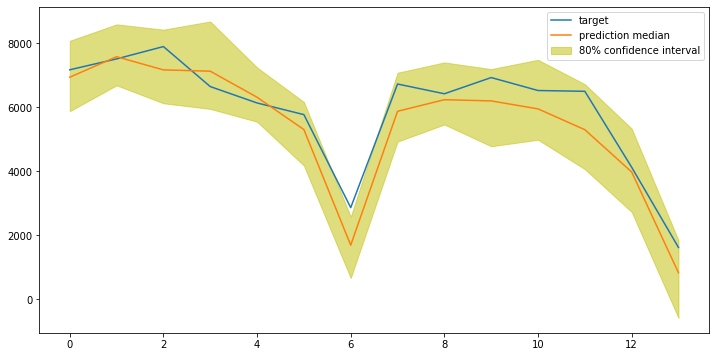

In [51]:
# display predictions
display_quantiles(prediction_list, target_ts)

In [52]:
from sklearn.metrics import r2_score
target_ts_metric = target_ts[0][-14:].values
pred_ts_metric = prediction_list[0]['0.5'].values
print(r2_score(target_ts_metric, pred_ts_metric))

0.8544873557245587


## Predicting the Future

In [53]:
start_date = '2021-03-01'
timestamp = '00:00:00'

# formatting start_date
start_time = start_date +' '+ timestamp

request_data = {"instances": [{"start": start_time, "target": []}],
                "configuration": {"num_samples": 50,
                                  "output_types": ["quantiles"],
                                  "quantiles": ['0.1', '0.5', '0.9']}
                }

json_input = json.dumps(request_data).encode('utf-8')

print('Requesting prediction for '+start_time)

Requesting prediction for 2021-03-01 00:00:00


In [54]:
# get prediction response
json_prediction = predictor.predict(json_input)

prediction_march = decode_prediction(json_prediction)

In [55]:
# create 2010 time series

# get global consumption data
# index 1112 is where the 2010 data starts
data_2010 = 14#mean_power_df.values[1112:]

ts_march = []
index = pd.date_range(start=start_date, periods=14, freq='D')#len(data_2010)
ts_march.append(pd.Series(data=data_2010, index=index))

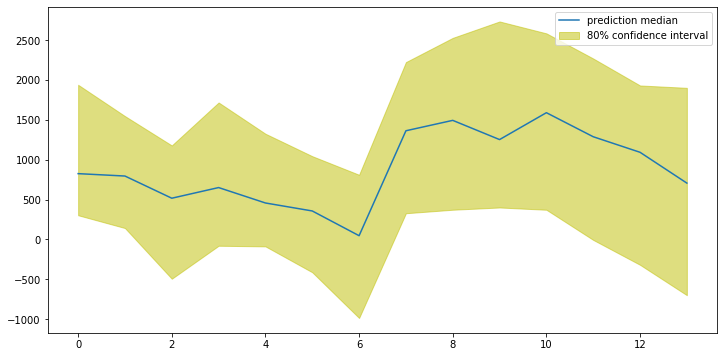

In [60]:
start_idx=0 # days since Jan 1st 2010
end_idx=start_idx+prediction_length

# get target data
target_march_ts = [ts_march[0][start_idx:end_idx]]

# display predictions
display_quantiles2(prediction_march, target_march_ts)

In [61]:
prediction_march

[           0.1          0.9          0.5
 0   303.074799  1939.250732   824.907288
 1   142.609955  1546.614502   794.869385
 2  -492.904114  1178.477295   516.716187
 3   -79.539917  1717.063232   650.337280
 4   -87.222260  1325.477051   456.989563
 5  -412.086365  1043.897095   356.901245
 6  -985.091187   810.658447    46.637665
 7   328.371948  2223.531494  1362.629272
 8   372.151550  2527.424072  1493.013184
 9   400.483978  2733.230469  1252.137817
 10  371.970032  2584.092773  1589.176758
 11   -6.176483  2268.825928  1287.738770
 12 -318.479706  1930.701782  1092.667358
 13 -699.346802  1900.874023   706.151123]

In [58]:
## TODO: delete the endpoint
predictor.delete_endpoint()

In [59]:
# display the prediction median against the actual data
def display_quantiles2(prediction_list, target_ts=None):
    # show predictions for all input ts
    for k in range(len(prediction_list)):
        plt.figure(figsize=(12,6))
        # get the target month of data
        if target_ts is not None:
            target = target_ts[k][-prediction_length:]
            #plt.plot(range(len(target)), target, label='target')
        # get the quantile values at 10 and 90%
        p10 = prediction_list[k]['0.1']
        p90 = prediction_list[k]['0.9']
        # fill the 80% confidence interval
        plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
        # plot the median prediction line
        prediction_list[k]['0.5'].plot(label='prediction median')
        plt.legend()
        plt.show()